In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

book = pd.read_csv('book.csv')
print(book.head())
print(book.value_counts('genre'))


                    books          author_name          genre publish_date
0   To Kill a Mockingbird           Harper Lee        Fiction         1960
1                    1984        George Orwell      Dystopian         1949
2     Pride and Prejudice          Jane Austen        Romance         1813
3        The Great Gatsby  F. Scott Fitzgerald        Classic         1925
4  The Catcher in the Rye                  NaN  Coming-of-Age         1951
genre
Adventure                 2
Drama                     2
Science Fiction           2
Historical Fiction        2
Fantasy                   2
Young Adult               2
Romance                   2
Classic                   1
Coming-of-Age             1
Contemporary              1
Gothic                    1
Fiction                   1
Dystopian                 1
Mystery                   1
Inspirational             1
Horror                    1
Non-fiction               1
Psychological Thriller    1
Philosophical Fiction     1
Thriller    

In [52]:
#print(book.describe())
print(book.dtypes)
print(book.info())


books           object
author_name     object
genre           object
publish_date    object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   books         31 non-null     object
 1   author_name   32 non-null     object
 2   genre         28 non-null     object
 3   publish_date  35 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB
None


In [53]:
book['publish_date'] = book['publish_date'].astype(int)
print(book.dtypes)


ValueError: invalid literal for int() with base 10: ' '

In [ ]:
book.select_dtypes('number').head()

,publish_date
0,1960.0
1,1949.0
2,1813.0
3,1925.0
4,1951.0


In [ ]:
book.select_dtypes('object').head()

,books,author_name,genre
0,To Kill a Mockingbird,Harper Lee,Fiction
1,1984,George Orwell,Dystopian
2,Pride and Prejudice,Jane Austen,Romance
3,The Great Gatsby,F. Scott Fitzgerald,Classic
4,The Catcher in the Rye,J.D. Salinger,Coming-of-Age


1813.0
2012.0


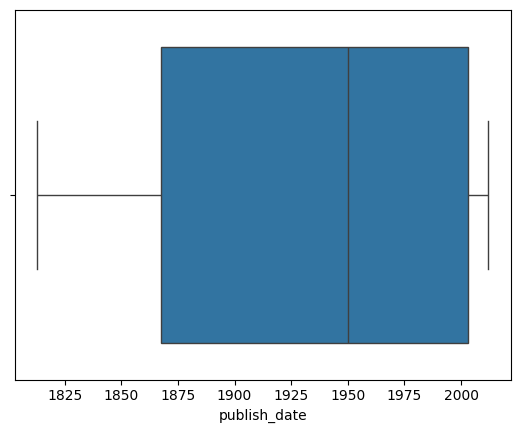

In [ ]:
print(book['publish_date'].min())
print(book['publish_date'].max())

sns.boxplot(data=book, x='publish_date')
plt.show()

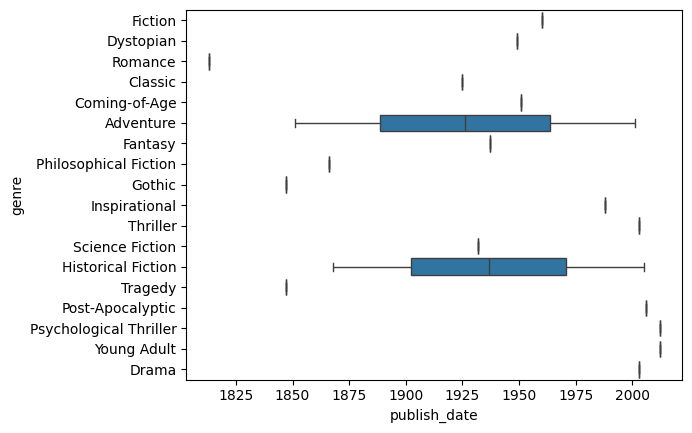

In [ ]:
sns.boxplot(data=book, x='publish_date',y='genre')
plt.show()

In [ ]:
print(book.isna().sum())
# threshold = len(book) * 0.05
# print(threshold)
book.fillna('none',inplace=True)
print(book.isna().sum())
# print(book)

books           4
author_name     3
genre           7
publish_date    0
dtype: int64
books           0
author_name     0
genre           0
publish_date    0
dtype: int64


In [ ]:
print(book['author_name'].value_counts())


author_name
none                     3
Colleen Hoover           3
George Orwell            1
Jane Austen              1
F. Scott Fitzgerald      1
Herman Melville          1
Harper Lee               1
Fyodor Dostoevsky        1
Charlotte Brontë         1
Paulo Coelho             1
Dan Brown                1
Aldous Huxley            1
 Louisa May Alcott       1
 Emily Brontë            1
J.R.R. Tolkien           1
Markus Zusak             1
Cormac McCarthy          1
John Green               1
Gillian Flynn            1
Haruki Murakami          1
Stephen King             1
Yuval Noah Harari        1
Khaled Hosseini          1
 Tara Westover           1
Alex Michaelides         1
Matt Haig                1
Sally Rooney             1
Gregory David Roberts    1
Paula Hawkins            1
Frank Herbert            1
Toni Morrison            1
Name: count, dtype: int64
31


In [ ]:
print(book['author_name'].nunique())

31


In [ ]:
book['author_name'].str.contains('Colleen Hoover')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32     True
33     True
34     True
Name: author_name, dtype: bool

In [ ]:
print(book.isna().sum())
print(book.info())

books           4
author_name     3
genre           7
publish_date    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   books         31 non-null     object
 1   author_name   32 non-null     object
 2   genre         28 non-null     object
 3   publish_date  35 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB
None


In [ ]:
less=len(book)*0.15
new_book = book.columns[book.isna().sum()<=less]
print(new_book)
# book.dropna(subset=new_book ,inplace= True)
print(book.isna().sum())

Index(['books', 'author_name', 'publish_date'], dtype='object')
books           4
author_name     3
genre           7
publish_date    0
dtype: int64


Remove the columns which has more then 15% of the missing values in column   
all the column which has less then 29 values has elements are remove 

In [ ]:
limit=len(book)*0.15
book = book.dropna(axis=1, thresh=len(book) - limit)  # thresh = 90 
print(book.isna().sum())

books           4
author_name     3
publish_date    0
dtype: int64


In [ ]:
one = book.dropna()
print(one.isna().sum())
print(len(one))
print(book.isna().sum())

books           0
author_name     0
publish_date    0
dtype: int64
29
books           4
author_name     3
publish_date    0
dtype: int64


In [54]:
two = book['publish_date'].mode()
print(two)

0    2012
Name: publish_date, dtype: object
